# Clustering Algorithms

The commonly used clustering algorithms can be divided in 4 categories:
- Centroid-based
- Hierarchical
- Distribution-based
- Density-based

In this lecture, we're gonna get into the elementary concepts of each category, and we're gonna create a clustering model using such knowledge.

### Clustering as a classic ML problem

First, a brief introduction:
Clustering is a canonical ML problem, is part of the reign of Unsupervised Learning because it is *not* used to classify any outcome, but to learn the hidden structure within the data in order to find structure or patterns.

#### K-means Clustering

- Pick an initial solution (algoritgms exist to pick well)
    - Set the hyperparameters
        - Number of clusters
        - Initial values of centroids
- Iterate until convergence
    - Update assignments of points to clusters
        - Distance measure between point, cluster
            - Euclidean distance often used
    - Update coordinates of recerence vectors (**centroids**)
        - Calculating cluster center from points in cluster
            - Centroid (simple average) often used
- Keep iterating until convergence

## Evaluating Clustering Models

### Homogeinity

- Each cluster should contain members of the same class

### Completeness

- All members of a class should lie in the same cluser

>Homogeinity and Completeness are inversely related
<br>Each lies between 0 and 1
<br>Similar to precision and recall
<br>Need a metric to optimize trade-off

### V-measure

- Harmonic mean of Homogeinity and Completeness
- Closer to lower of two
- Favors even weightage to both metrics

>Related set of metrics
<br>Bounded scores between 0 and 1
<br>Easy to interpret - higher is better
<br>Apply to any algorithm
<br>However, require **labeled data**

There are other metrics to evaluate the clustering models, but for now we'll stay at this point.

## Exploring and Performing K-means Clustering in the Iris Dataset

In [7]:
# First we import the libraries that we're gonna use in this exercise
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Make sure you also import the K-means estimator object and ignore the warnings
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [24]:
# Now, let's read the iris dataset and convert it into a dataframe
from sklearn.datasets import load_iris
iris = load_iris()
#iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['class'])
iris_df= pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [25]:
# Let's resample the df to have a more aleatory index order
iris_df = iris_df.drop('target', axis=1)
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.7,5.1,1.9,virginica
1,6.3,2.9,5.6,1.8,virginica
2,6.7,3.0,5.0,1.7,versicolor
3,5.0,2.0,3.5,1.0,versicolor
4,6.1,2.8,4.0,1.3,versicolor


In [26]:
iris_df.shape

(150, 5)

In [28]:
# Let's see the unique labels in the df
iris_df['species'].unique() 

['virginica', 'versicolor', 'setosa']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Remember, the algorithm only works with numerical data, so we have to encode the categorical variables to proceed

In [29]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()

iris_df['species'] = label_encoding.fit_transform(iris_df['species'].astype(str))
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.7,5.1,1.9,2
1,6.3,2.9,5.6,1.8,2
2,6.7,3.0,5.0,1.7,1
3,5.0,2.0,3.5,1.0,1
4,6.1,2.8,4.0,1.3,1


Now, let's see how the data distributes in the dataframe and how the relation looks like

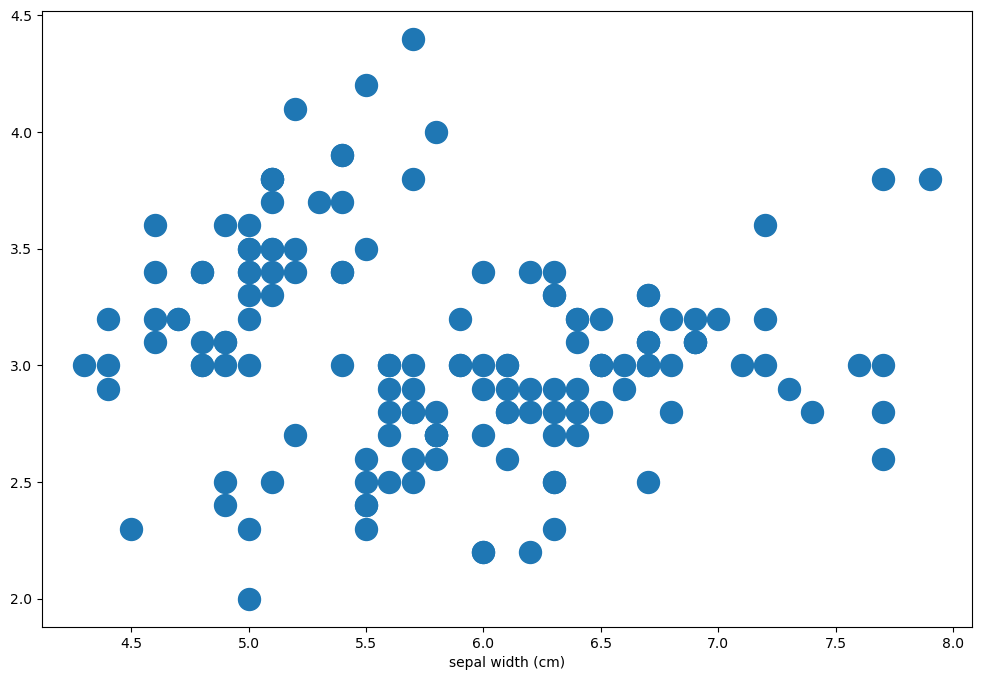

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], s = 250)

plt.xlabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')

plt.show()

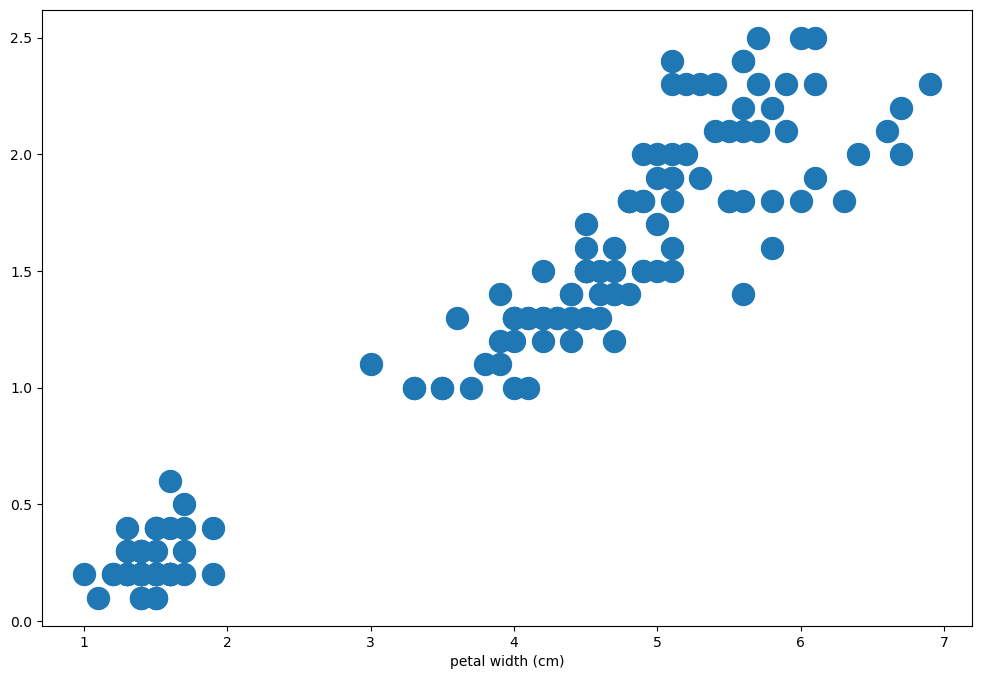

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], s = 250)

plt.xlabel('petal length (cm)')
plt.xlabel('petal width (cm)')

plt.show()

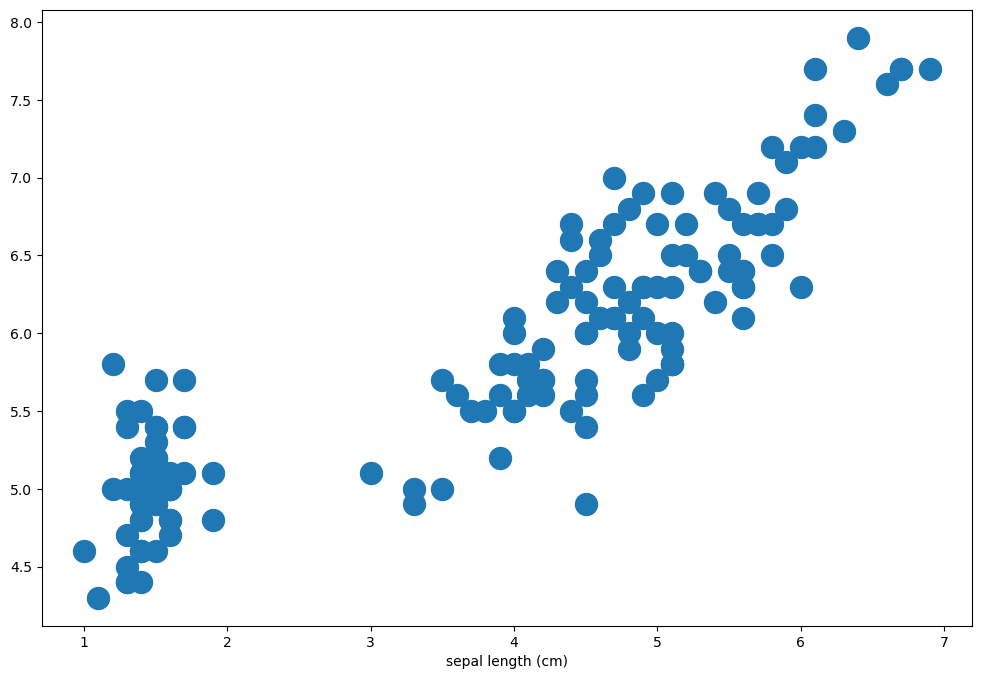

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['petal length (cm)'], iris_df['sepal length (cm)'], s = 250)

plt.xlabel('petal length (cm)')
plt.xlabel('sepal length (cm)')

plt.show()